# Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10) 

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


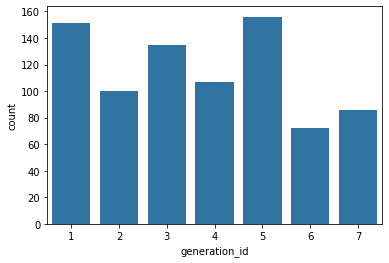

In [3]:
# Get first color_pallete and set it as color of the chart
base_color = sb.color_palette()[0]
# generate graph 
sb.countplot(data = pokemon, x = 'generation_id', color = base_color )

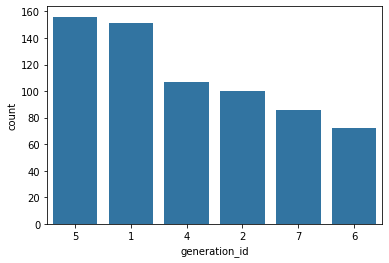

In [4]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = (5,1,4,2,7,6) )

In [5]:
# Get order automatically
gen_order = pokemon['generation_id'].value_counts().index

In [6]:
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

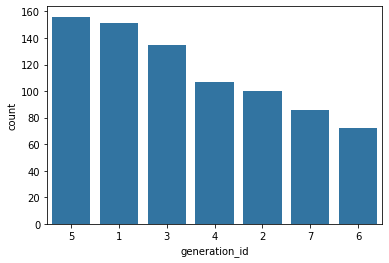

In [7]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order );

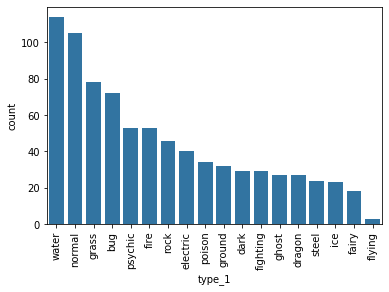

In [8]:
# generate ordered graph for type_1 pokemons
gen_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = gen_order );
# rotate values on x axe
plt.xticks(rotation = 90);

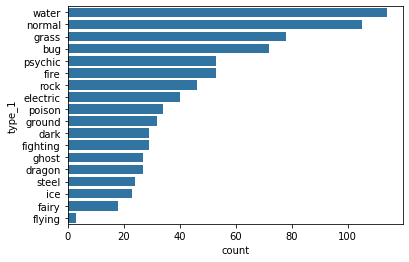

In [9]:
# make horizontal barchar
sb.countplot(data = pokemon,
             y = 'type_1', 
             color = base_color, 
             order = gen_order );

# Absolute vs Relative Frequency

In [10]:
import pandas as pd
import seaborn as sb
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
pkmn_types = pokemon.melt(id_vars = ['id', 'identifier'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level',
                          value_name = 'type')
pkmn_types[802:812]


/home/zz1460/prj/Learn_Udacity_AI_with_Python/venv3/lib/python3.6/site-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/home/zz1460/prj/Learn_Udacity_AI_with_Python/venv3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,id,identifier,type_level,type
802,803,NaN,type_1,poison
803,804,NaN,type_1,poison
804,805,NaN,type_1,rock
805,806,NaN,type_1,fire
806,807,NaN,type_1,electric
807,1,NaN,type_2,poison
808,2,NaN,type_2,poison
809,3,NaN,type_2,poison
810,4,NaN,type_2,NaN
811,5,NaN,type_2,NaN


In [11]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

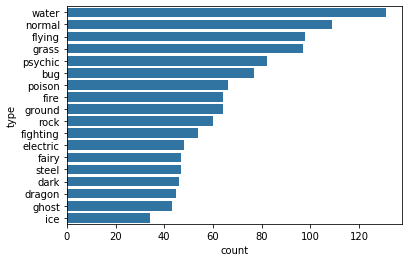

In [12]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

# Relative way of processing the same data

In [13]:
# number of pokemons
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
# print(pokemon.shape[0])
max_prop = max_type_count / n_pokemon
# print(max_prop)

In [14]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

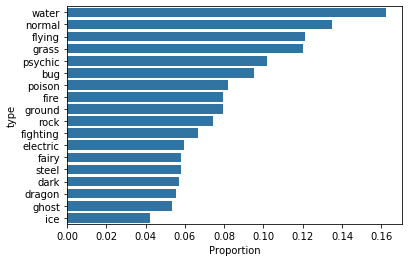

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, 
             y = 'type', color= base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('Proportion');

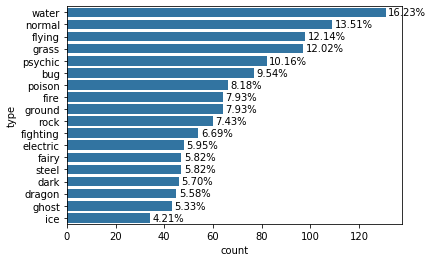

In [16]:
n_pokemon = pokemon.shape[0]
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = f'{100*count/n_pokemon:0.2f}%'
    plt.text(count+1,  i, pct_string, va = 'center');

# Counting Missing Data

One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column


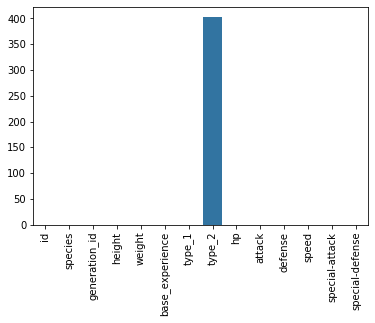

In [17]:
# What if we want to visualize these missing value counts? We could treat the variable names as levels of 
# a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, 
# unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is
# built to depict a summary of one quantitative variable against levels of a second, qualitative variable, 
# but can be used here.

na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);
# The first argument to the function contains the x-values (column names), the second argument the y-values
# (our counts).


# Pie Charts


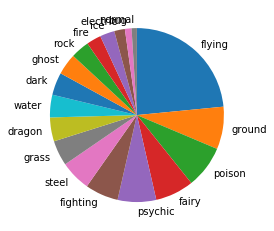

In [18]:
# code for the pie chart seen above
sorted_counts = pokemon['type_2'].value_counts()
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90,
        counterclock = False);


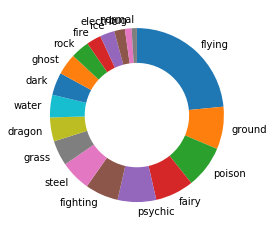

In [19]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});

# Histograms

## For Quantitative variables

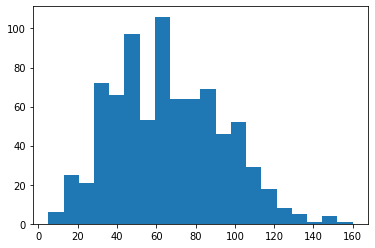

In [22]:
# bins are "bit wide" on 'X' axis.
#bins = np.arange(0, pokemon['speed'], max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=20);
